In [2]:
!pip install scikeras

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, BatchNormalization, Dropout
from sklearn.model_selection import KFold
from scikeras.wrappers import KerasClassifier



In [4]:
# Load the dataset
df_train = pd.read_csv('UNSW_NB15_training-set.csv')
df_test = pd.read_csv('UNSW_NB15_testing-set.csv')
df_train

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [5]:
df_train = df_train.drop(['id','attack_cat'], axis=1)
df_test = df_test.drop(['id','attack_cat'], axis=1)

In [6]:
# Encode categorical columns
label_encoder = preprocessing.LabelEncoder()
df_train['proto'] = label_encoder.fit_transform(df_train['proto'])
df_train['service'] = label_encoder.fit_transform(df_train['service'])
df_train['state'] = label_encoder.fit_transform(df_train['state'])

df_test['proto'] = label_encoder.fit_transform(df_test['proto'])
df_test['service'] = label_encoder.fit_transform(df_test['service'])
df_test['state'] = label_encoder.fit_transform(df_test['state'])

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                82332 non-null  float64
 1   proto              82332 non-null  int64  
 2   service            82332 non-null  int64  
 3   state              82332 non-null  int64  
 4   spkts              82332 non-null  int64  
 5   dpkts              82332 non-null  int64  
 6   sbytes             82332 non-null  int64  
 7   dbytes             82332 non-null  int64  
 8   rate               82332 non-null  float64
 9   sttl               82332 non-null  int64  
 10  dttl               82332 non-null  int64  
 11  sload              82332 non-null  float64
 12  dload              82332 non-null  float64
 13  sloss              82332 non-null  int64  
 14  dloss              82332 non-null  int64  
 15  sinpkt             82332 non-null  float64
 16  dinpkt             823

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 43 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                175341 non-null  float64
 1   proto              175341 non-null  int64  
 2   service            175341 non-null  int64  
 3   state              175341 non-null  int64  
 4   spkts              175341 non-null  int64  
 5   dpkts              175341 non-null  int64  
 6   sbytes             175341 non-null  int64  
 7   dbytes             175341 non-null  int64  
 8   rate               175341 non-null  float64
 9   sttl               175341 non-null  int64  
 10  dttl               175341 non-null  int64  
 11  sload              175341 non-null  float64
 12  dload              175341 non-null  float64
 13  sloss              175341 non-null  int64  
 14  dloss              175341 non-null  int64  
 15  sinpkt             175341 non-null  float64
 16  di

In [9]:
df_train.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')

In [10]:
# Get a scaler object
scaler = MinMaxScaler()
for col in df_train.columns:
  print(col)
  df_train[col] = scaler.fit_transform(df_train[[col]])
  df_test[col] = scaler.fit_transform(df_test[[col]])

dur
proto
service
state
spkts
dpkts
sbytes
dbytes
rate
sttl
dttl
sload
dload
sloss
dloss
sinpkt
dinpkt
sjit
djit
swin
stcpb
dtcpb
dwin
tcprtt
synack
ackdat
smean
dmean
trans_depth
response_body_len
ct_srv_src
ct_state_ttl
ct_dst_ltm
ct_src_dport_ltm
ct_dst_sport_ltm
ct_dst_src_ltm
is_ftp_login
ct_ftp_cmd
ct_flw_http_mthd
ct_src_ltm
ct_srv_dst
is_sm_ips_ports
label


In [11]:
df_train

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,1.833334e-07,0.900000,0.0,0.666667,0.000094,0.000000,0.000033,0.000000,0.090909,0.996078,...,0.000000,0.0,0.016129,0.0,0.0,0.0,0.000000,0.016393,0.0,0.0
1,1.333334e-07,0.900000,0.0,0.666667,0.000094,0.000000,0.000121,0.000000,0.125000,0.996078,...,0.000000,0.0,0.016129,0.0,0.0,0.0,0.000000,0.016393,0.0,0.0
2,8.333335e-08,0.900000,0.0,0.666667,0.000094,0.000000,0.000073,0.000000,0.200000,0.996078,...,0.000000,0.0,0.032258,0.0,0.0,0.0,0.000000,0.032787,0.0,0.0
3,1.000000e-07,0.900000,0.0,0.666667,0.000094,0.000000,0.000061,0.000000,0.166667,0.996078,...,0.017241,0.0,0.032258,0.0,0.0,0.0,0.016949,0.032787,0.0,0.0
4,1.666667e-07,0.900000,0.0,0.666667,0.000094,0.000000,0.000146,0.000000,0.100000,0.996078,...,0.017241,0.0,0.032258,0.0,0.0,0.0,0.016949,0.032787,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,8.333335e-08,0.900000,0.0,0.666667,0.000094,0.000000,0.000006,0.000000,0.200000,0.996078,...,0.000000,0.0,0.016129,0.0,0.0,0.0,0.016949,0.000000,0.0,0.0
82328,1.843502e-02,0.853846,0.0,0.500000,0.001785,0.000726,0.001257,0.000024,0.000024,0.996078,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.033898,0.016393,0.0,0.0
82329,0.000000e+00,0.046154,0.0,0.666667,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0
82330,0.000000e+00,0.046154,0.0,0.666667,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0


In [12]:
# Split the data into features and labels
X = df_train.drop(['label'], axis=1)
y = df_train['label']

# Split the data into training and testing sets
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=10)

x_test = df_test.drop(['label'], axis=1)
y_test = df_test['label']

In [13]:
# Build the neural network model
model_ann = Sequential()
model_ann.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model_ann.add(Dense(128, activation='relu'))
model_ann.add(Dense(64, activation='relu'))
model_ann.add(Dense(32, activation='relu'))
model_ann.add(Dense(1, activation='sigmoid'))

# Compile the model
model_ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
model_ann.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val), callbacks=[early_stopping])


Epoch 1/10
2059/2059 [==============================] - 12s 4ms/step - loss: 0.2266 - accuracy: 0.8926 - val_loss: 0.1709 - val_accuracy: 0.9251
Epoch 2/10
2059/2059 [==============================] - 8s 4ms/step - loss: 0.1570 - accuracy: 0.9336 - val_loss: 0.1433 - val_accuracy: 0.9426
Epoch 3/10
2059/2059 [==============================] - 9s 4ms/step - loss: 0.1427 - accuracy: 0.9418 - val_loss: 0.1322 - val_accuracy: 0.9482
Epoch 4/10
2059/2059 [==============================] - 9s 4ms/step - loss: 0.1304 - accuracy: 0.9466 - val_loss: 0.1502 - val_accuracy: 0.9356
Epoch 5/10
2059/2059 [==============================] - 9s 4ms/step - loss: 0.1173 - accuracy: 0.9531 - val_loss: 0.1251 - val_accuracy: 0.9517
Epoch 6/10
2059/2059 [==============================] - 8s 4ms/step - loss: 0.1139 - accuracy: 0.9540 - val_loss: 0.1084 - val_accuracy: 0.9560
Epoch 7/10
2059/2059 [==============================] - 9s 4ms/step - loss: 0.1099 - accuracy: 0.9552 - val_loss: 0.1077 - val_accuracy

In [14]:
def create_model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(BatchNormalization())

    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())

    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model_cnn = create_model()

In [15]:
# Train the model with early stopping
model_cnn.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val), callbacks=[early_stopping])


Epoch 1/10
2059/2059 [==============================] - 24s 8ms/step - loss: 0.7488 - accuracy: 0.8749 - val_loss: 0.2802 - val_accuracy: 0.9380
Epoch 2/10
2059/2059 [==============================] - 18s 9ms/step - loss: 0.2981 - accuracy: 0.9205 - val_loss: 0.2520 - val_accuracy: 0.9259
Epoch 3/10
2059/2059 [==============================] - 17s 8ms/step - loss: 0.2470 - accuracy: 0.9323 - val_loss: 0.2332 - val_accuracy: 0.9331
Epoch 4/10
2059/2059 [==============================] - 16s 8ms/step - loss: 0.2237 - accuracy: 0.9390 - val_loss: 0.2049 - val_accuracy: 0.9458
Epoch 5/10
2059/2059 [==============================] - 16s 8ms/step - loss: 0.2135 - accuracy: 0.9409 - val_loss: 0.1890 - val_accuracy: 0.9503
Epoch 6/10
2059/2059 [==============================] - 16s 8ms/step - loss: 0.2064 - accuracy: 0.9406 - val_loss: 0.1770 - val_accuracy: 0.9435
Epoch 7/10
2059/2059 [==============================] - 17s 8ms/step - loss: 0.2032 - accuracy: 0.9415 - val_loss: 0.1684 - val_ac

5480/5480 [==============================] - 9s 2ms/step
Accuracy:  0.8800223564368859
              precision    recall  f1-score   support

         0.0       0.73      0.98      0.84     56000
         1.0       0.99      0.83      0.90    119341

    accuracy                           0.88    175341
   macro avg       0.86      0.91      0.87    175341
weighted avg       0.91      0.88      0.88    175341

[[54835  1165]
 [19872 99469]]


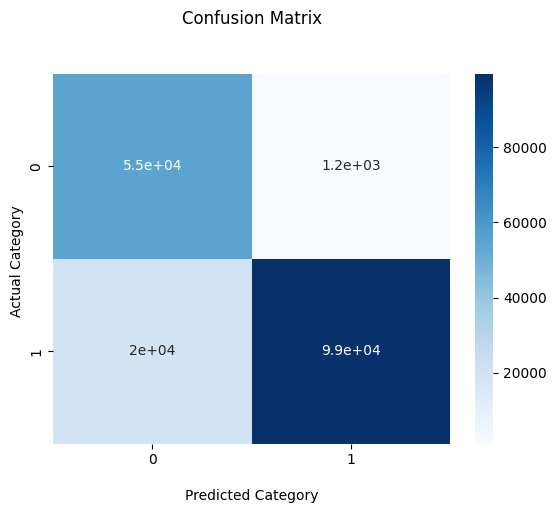

In [16]:
# Evaluate the model on the test set
y_pred_proba = model_ann.predict(x_test)
prediction_ann = (y_pred_proba > 0.5).astype(int)

# Calculate and print metrics
acc_ann = accuracy_score(y_test, prediction_ann)
print('Accuracy: ', accuracy_score(y_test, prediction_ann))
print(classification_report(y_test, prediction_ann))

cm = confusion_matrix(y_test, prediction_ann)
print (cm)
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
plt.show()

5480/5480 [==============================] - 12s 2ms/step
Accuracy:  0.8748495788206979
              precision    recall  f1-score   support

         0.0       0.73      0.97      0.83     56000
         1.0       0.98      0.83      0.90    119341

    accuracy                           0.87    175341
   macro avg       0.86      0.90      0.87    175341
weighted avg       0.90      0.87      0.88    175341

[[54466  1534]
 [20410 98931]]


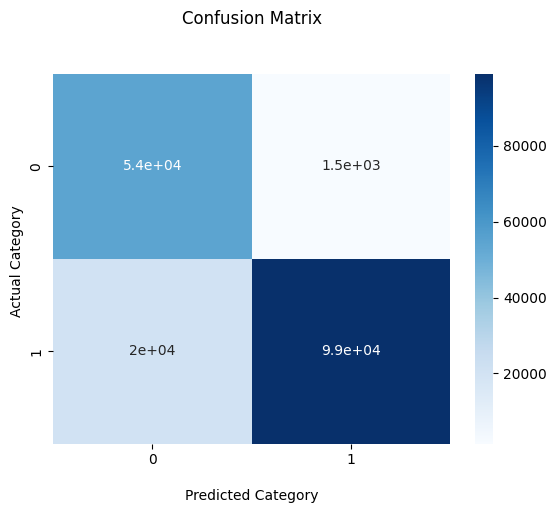

In [17]:
# Evaluate the model on the test set
y_pred_proba = model_cnn.predict(x_test)
prediction_cnn = (y_pred_proba > 0.5).astype(int)

# Calculate and print metrics
acc_cnn = accuracy_score(y_test, prediction_cnn)
print('Accuracy: ', accuracy_score(y_test, prediction_cnn))
print(classification_report(y_test, prediction_cnn))

cm = confusion_matrix(y_test, prediction_cnn)
print (cm)
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
plt.show()

In [18]:
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)

GaussianNB()

In [19]:
prediction_nb = model_nb.predict(x_test)

# Calculate and print metrics
acc_nb = accuracy_score(y_test, prediction_nb)
print('Accuracy: ', accuracy_score(y_test, prediction_nb))
print(classification_report(y_test, prediction_nb))

Accuracy:  0.7461574874102463
              precision    recall  f1-score   support

         0.0       0.56      0.92      0.70     56000
         1.0       0.94      0.67      0.78    119341

    accuracy                           0.75    175341
   macro avg       0.75      0.79      0.74    175341
weighted avg       0.82      0.75      0.75    175341



In [20]:
model_rf  = RandomForestClassifier().fit(x_train,y_train)

In [21]:
prediction_rf = model_rf.predict(x_test)

# Calculate and print metrics
acc_rf = accuracy_score(y_test, prediction_rf)
print('Accuracy: ', accuracy_score(y_test, prediction_rf))
print(classification_report(y_test, prediction_rf))

Accuracy:  0.8840944217268066
              precision    recall  f1-score   support

         0.0       0.74      0.98      0.84     56000
         1.0       0.99      0.84      0.91    119341

    accuracy                           0.88    175341
   macro avg       0.86      0.91      0.88    175341
weighted avg       0.91      0.88      0.89    175341



In [22]:
model_knn = KNeighborsClassifier().fit(x_train, y_train)

In [23]:
model_knn = model_knn.predict(x_test)

# Calculate and print metrics
acc_knn = accuracy_score(y_test, model_knn)
print('Accuracy: ', accuracy_score(y_test, model_knn))
print(classification_report(y_test, model_knn))

Accuracy:  0.851010317039369
              precision    recall  f1-score   support

         0.0       0.69      0.97      0.81     56000
         1.0       0.98      0.80      0.88    119341

    accuracy                           0.85    175341
   macro avg       0.84      0.88      0.84    175341
weighted avg       0.89      0.85      0.86    175341



In [24]:
models = pd.DataFrame({'Model':['CNN','ANN','Naive Bayes','Random Forest','KNN'],
                      'Score':[ acc_cnn,acc_ann,acc_nb,acc_rf,acc_knn]})

In [25]:
models.sort_values(by='Score',ascending = False)

,Model,Score
3,Random Forest,0.884094
1,ANN,0.880022
0,CNN,0.874850
4,KNN,0.851010
2,Naive Bayes,0.746157


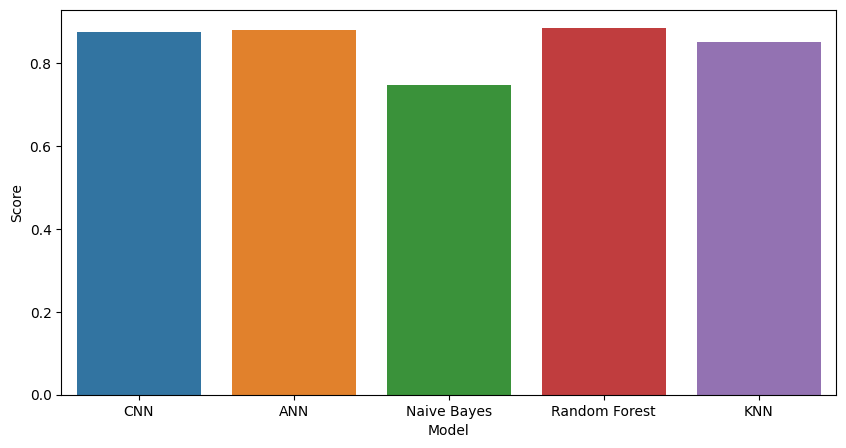

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(x= 'Model',y='Score',data = models)
plt.show()